In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [5]:
# Handle missing values (if any)
data = data.dropna()

In [6]:
# Separate features and target variable
X = data.drop('target', axis=1)
y = data['target']

In [7]:
# Encode categorical variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [8]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [9]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create the logistic regression model with regularization
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', penalty='l2'))
])

In [15]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'ca', 'thal'])])),
                ('classifier', LogisticRegression(solver='liblinear'))])

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [22]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

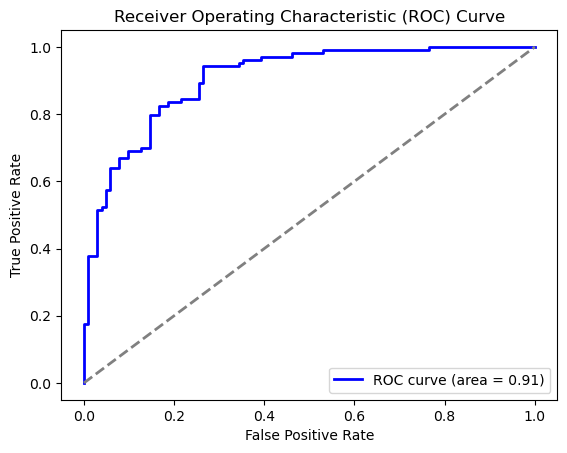

In [23]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Interpret the coefficients
coefficients = model.named_steps['classifier'].coef_[0]
features = numerical_features + list(model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
feature_importance = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

In [25]:
# Calculate odds ratios
feature_importance['Odds Ratio'] = np.exp(feature_importance['Coefficient'])

In [30]:
# Display feature importance
print("Feature Importance with Odds Ratios")
print(feature_importance)

Feature Importance with Odds Ratios
      Feature  Coefficient  Odds Ratio
0         age     0.255666    1.291322
1    trestbps    -0.410215    0.663508
2        chol    -0.412019    0.662312
3     thalach     0.531254    1.701063
4     oldpeak    -0.594951    0.551590
5       sex_0     0.876477    2.402421
6       sex_1    -0.836215    0.433348
7        cp_0    -1.279474    0.278184
8        cp_1    -0.098985    0.905756
9        cp_2     0.413950    1.512781
10       cp_3     1.004772    2.731284
11      fbs_0    -0.124305    0.883110
12      fbs_1     0.164567    1.178883
13  restecg_0    -0.000090    0.999910
14  restecg_1     0.209980    1.233653
15  restecg_2    -0.169628    0.843979
16    exang_0     0.352167    1.422145
17    exang_1    -0.311904    0.732052
18    slope_0     0.132314    1.141466
19    slope_1    -0.646984    0.523623
20    slope_2     0.554932    1.741823
21       ca_0     1.560000    4.758819
22       ca_1    -0.591316    0.553598
23       ca_2    -1.561808  

In [31]:
# Display evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

In [32]:
print("\nEvaluation Metrics")
for metric, value in evaluation_metrics.items():
    print(f"{metric}: {value:.2f}")


Evaluation Metrics
Accuracy: 0.82
Precision: 0.78
Recall: 0.89
F1 Score: 0.83
ROC AUC: 0.91
